# Statistiques et Analyse en Composante Principale

### On donne les fonctions du TP précédent

In [1]:
# Ecrire une fonction donnant la moyenne d'une série statistique
def moy(X):
    e=0
    n=len(X)
    for i in range(n):
        e+=X[i]
    return e/n

In [2]:
# La variance d'une série statistique:
def varS(X):
    v=0
    n=len(X)
    m=moy(X)
    for i in range(n):
        v+=(X[i]-m)^2
    return v/n

In [3]:
# l'écart-type
def ecTypeS(X):
    return sqrt(varS(X))

In [4]:
# Ecrire une fonction donnant la loi marginals  P(X=a) à partir des lois conjointes 
def margX(a,Y,C):
    s=0
    for j in Y:
        s+=C[(a,j)]
    return s

In [5]:
# Toutes les lois marginales de X sous forme d'un dictionnaire
def MargX(X,Y,C):
    return {i:margX(i,Y,C) for i in X}

In [6]:
# idem pour Y
def margY(b,X,C):
    s=0
    for i in X:
        s+=C[(i,b)]
    return s

In [7]:
# Calcul des lois marginales de Y à partir de la matrice conjointe
def MargY(X,Y,C):
    return {j:margY(j,X,C) for j in Y}

In [8]:
# Ecrire une fonction calculant la covariance d'un couple de séries statistiques
def covS(X,Y):
    n=len(X)
    MX=moy(X)
    MY=moy(Y)
    sol=0
    for i in range(n):
        sol+=(X[i]-MX)*(Y[i]-MY)
    return sol/n

In [9]:
# et le Coefficient de corrélation d'une série statistique
def corS(X,Y):
    return covS(X,Y)/(sqrt(varS(X))*sqrt(varS(Y)))

In [10]:
# Construction de la matrice de covariance 
def matCov(D):
    mat=[]
    for a in D.values():
        L=[]
        for b in D.values():
            L.append(round(covS(a,b),ndigits=3))
        mat.append(L)
    A = matrix(mat)
    return A

In [11]:
# et de la matrice de corrélation
def matCor(D):
    mat=[]
    for a in D.values():
        L=[]
        for b in D.values():
            L.append(round(corS(a,b),ndigits=5))
        mat.append(L)
    A = matrix(mat)
    return A

## Exercice 1 

In [12]:
# Etude qualitative de 4 variables aléatoires couplées
data={1:[0,1,2,3,4,5,6,7,8,9,10] ,
  2:[2.04,3.02,4.15,4.97,6.02,7.08,8.12,9.14,10.13,10.86,11.89],
  3:[5.01,7.93,3.27,20.50,11.33,12.41,16.74,11.39,16.61,11.48,23.59],
  4:[7.45,8.20,2.09,9.03,7.99,8.58,9.63,5.06,2.49,8.22,8.01],
  5:[10.04,9.02,8.97,8.15,6.02,5.08,4.12,3.14,2.86,2.13,1.89]}

In [13]:
show(matCov(data))
MCor=matCor(data)
show(MCor)

[   10.0   9.908   12.21  -0.202   -8.96]
[  9.908   9.825  11.997  -0.331    -8.9]
[  12.21  11.997  35.181   5.108 -10.218]
[ -0.202  -0.331   5.108   6.079  -0.038]
[  -8.96    -8.9 -10.218  -0.038   8.297]

[     1.0  0.99959  0.65097 -0.02588 -0.98366]
[ 0.99959      1.0  0.64528 -0.04286 -0.98568]
[ 0.65097  0.64528      1.0   0.3493 -0.59808]
[-0.02588 -0.04286   0.3493      1.0 -0.00539]
[-0.98366 -0.98568 -0.59808 -0.00539      1.0]

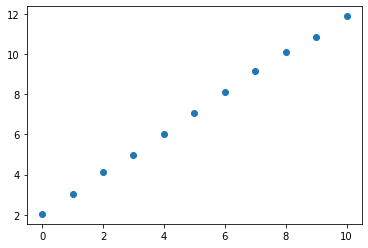

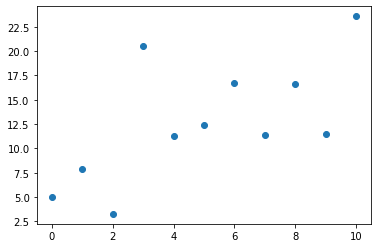

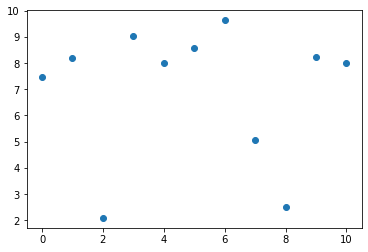

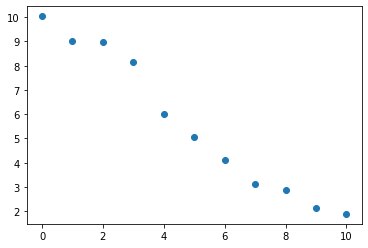

In [14]:
import matplotlib.pyplot as plt
# Représenter sur un même graphique les corrélations de la variable 1 avec les 4 autres variables
for point in list(data)[1:]:
    plt.scatter(data[1],data[point])
    plt.show()

In [15]:
# Représentation géométriquement les corrélations avec la première variable
import matplotlib.pyplot as plt
X = np.array([0,0,0,0,0])
Y= np.array([0,0,0,0,0])
# à compléter
plt.quiver(X, Y, U, V,scale=3)
a=1.2
plt.xlim(-a,a)
plt.ylim(-a,a)
plt.title("Représentation géométrique de la corrélation")

NameError: name 'np' is not defined

In [ ]:
# Représentation géométriquement les corrélations avec la première variable
import matplotlib.pyplot as plt
import numpy as np
X = np.array([0,0,0,0,0])
Y= np.array([0,0,0,0,0])
U=[]
V=[]
for c in MCor[0]:
    U.append(c)
    V.append(1-abs(c))
plt.quiver(X, Y, U, V,scale=3)
a=1.2
plt.xlim(-a,a)
plt.ylim(-a,a)
plt.title("Représentation géométrique de la corrélation")

### Exercice 2 :  Voitures

In [18]:
voitures={"Alfasud" : [1350 ,79 ,393, 161, 870 ,165],
"Audi" : [1588, 85, 468, 177, 1110 ,160 ],
"Simca"  : [1294 ,68, 424, 168, 1050 ,152 ],
"Citroen"  : [1222, 59, 412, 161, 930 ,151 ],
"Fiat" : [1585, 98, 439, 164,1105 ,165 ],
"Lancia"  :[1297 ,82 ,429, 169, 1080 ,160 ],
"Peugeot" :[ 1796, 79, 449 ,169, 1160 ,154 ],
"Renault16" : [1565,55, 424, 163, 1010 ,140], 
"Renault30": [2664, 128, 452, 173, 1320,180], 
"Toyota" : [1166, 55 ,399, 157, 815, 140], 
"Alfetta" :[ 1570, 109, 428, 162, 1060, 175], 
"Princess" : [1798 ,82, 445, 172, 1160 ,158 ],
"Datsun" :[1998 ,115, 469, 169, 1370 ,160 ],
"Taunus" : [1993, 98 ,438 ,170, 1080 ,167 ],
"Rancho" :[1442 ,80 ,431, 166, 1129, 144 ],
"Mazda" :[1769 ,83,440,165 ,1095, 165 ],
"Opel": [1979, 100 ,459 ,173, 1120 ,173], 
"Lada" : [1294, 68, 404 ,161, 955, 140] }

In [19]:
# Définir sous forme d'un dictionnaire, les 6 variables (cylindrée, puissance, longueur, largeur, poids, vitesse max)
voituresStats={"Cyl":[],"Puiss":[],"Long":[],"Larg":[],"Poids":[],"Vmax":[]}
for v in voitures.values():
    i=0
    for k in voituresStats:
        voituresStats[k].append(v[i])
        i+=1
show(voituresStats)

{'Cyl': [1350,
  1588,
  1294,
  1222,
  1585,
  1297,
  1796,
  1565,
  2664,
  1166,
  1570,
  1798,
  1998,
  1993,
  1442,
  1769,
  1979,
  1294],
 'Puiss': [79,
  85,
  68,
  59,
  98,
  82,
  79,
  55,
  128,
  55,
  109,
  82,
  115,
  98,
  80,
  83,
  100,
  68],
 'Long': [393,
  468,
  424,
  412,
  439,
  429,
  449,
  424,
  452,
  399,
  428,
  445,
  469,
  438,
  431,
  440,
  459,
  404],
 'Larg': [161,
  177,
  168,
  161,
  164,
  169,
  169,
  163,
  173,
  157,
  162,
  172,
  169,
  170,
  166,
  165,
  173,
  161],
 'Poids': [870,
  1110,
  1050,
  930,
  1105,
  1080,
  1160,
  1010,
  1320,
  815,
  1060,
  1160,
  1370,
  1080,
  1129,
  1095,
  1120,
  955],
 'Vmax': [165,
  160,
  152,
  151,
  165,
  160,
  154,
  140,
  180,
  140,
  175,
  158,
  160,
  167,
  144,
  165,
  173,
  140]}

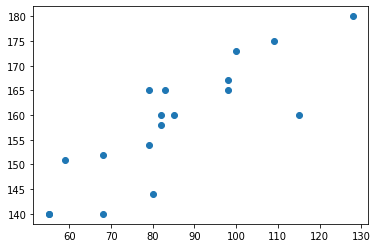

In [20]:
#Représenter quelques corrélations entre couples de variables
plt.scatter(voituresStats["Puiss"],voituresStats["Vmax"])
plt.show()

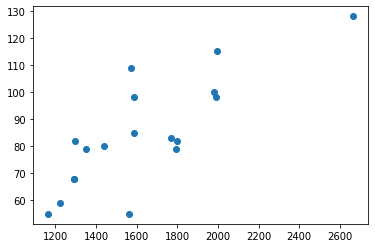

In [21]:
plt.scatter(voituresStats["Cyl"],voituresStats["Puiss"])
plt.show()

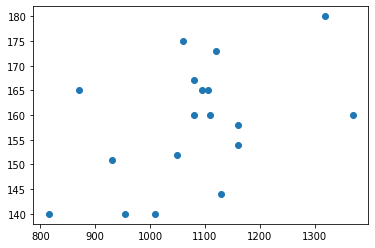

In [22]:
plt.scatter(voituresStats["Poids"],voituresStats["Vmax"])
plt.show()

In [23]:
# C'est parti pour l'Analyse en Composante Principale

In [24]:
# calculer la matrice de corrélation
MCV=matCor(voituresStats)
show(MCV)

[    1.0 0.79663 0.70146 0.62976 0.78895 0.66493]
[0.79663     1.0 0.64136 0.52083 0.76529 0.84438]
[0.70146 0.64136     1.0 0.84927 0.86809 0.47593]
[0.62976 0.52083 0.84927     1.0 0.71687 0.47295]
[0.78895 0.76529 0.86809 0.71687     1.0  0.4776]
[0.66493 0.84438 0.47593 0.47295  0.4776     1.0]

In [25]:
# Avec numpy

import numpy as np
test = np.stack((voituresStats["Cyl"],voituresStats["Puiss"],voituresStats["Long"],voituresStats["Larg"],voituresStats["Poids"],voituresStats["Vmax"]))
Cor=np.corrcoef(test)
show(Cor)


array([[1.        , 0.79662771, 0.70146192, 0.62975716, 0.78895203,
        0.66493402],
       [0.79662771, 1.        , 0.64136235, 0.52083197, 0.765293  ,
        0.84437948],
       [0.70146192, 0.64136235, 1.        , 0.84926635, 0.86809028,
        0.47592847],
       [0.62975716, 0.52083197, 0.84926635, 1.        , 0.71687392,
        0.47294527],
       [0.78895203, 0.765293  , 0.86809028, 0.71687392, 1.        ,
        0.4775956 ],
       [0.66493402, 0.84437948, 0.47592847, 0.47294527, 0.4775956 ,
        1.        ]])

In [32]:
#Déterminer ses valeurs propres
VP=MCV.eigenvalues()
print(MCV)
show(VP)

[    1.0 0.79663 0.70146 0.62976 0.78895 0.66493]
[0.79663     1.0 0.64136 0.52083 0.76529 0.84438]
[0.70146 0.64136     1.0 0.84927 0.86809 0.47593]
[0.62976 0.52083 0.84927     1.0 0.71687 0.47295]
[0.78895 0.76529 0.86809 0.71687     1.0  0.4776]
[0.66493 0.84438 0.47593 0.47295  0.4776     1.0]


[4.420857663577429,
 0.8560600374244822,
 0.37306922824231104,
 0.21392340995899686,
 0.0927954873171861,
 0.04329417347959396]

In [27]:
# Calculer l'inertie de la composante principale et du plan principal
SVP=0
for v in VP:
    SVP+=v
print(VP[0]/SVP)
print((VP[0]+VP[1])/SVP)



0.7368096105962382
0.8794862835003185


In [ ]:
#Représenter l'ébouli des valeurs propres

plt.title("Ebouli des valeurs propres")

In [ ]:
# Diagonaliser la matrice de corrélation. Soit P sa matrice de passage

In [28]:
MDiag,MPassage=MCV.eigenmatrix_right()
show(MPassage)
VP=MCV.eigenvalues()
MCV.eigenmatrix_right()

[ 0.42493579922729513  0.12418934321840484   0.3536142435638581   0.8077845714061599  0.15159834575607367 -0.05886907572733127]
[ 0.42179401008158185  0.41577937330229553   0.1849204521780031  -0.3577667250908393 -0.29373372243641527  -0.6330444083027313]
[ 0.42145996965788546 -0.41182170598614326 -0.06763582853720423 -0.27976159629251507   0.7305617358600323 -0.19029653304714414]
[ 0.38692275161710643  -0.4460874086172447  -0.6048619196624883  0.21158219815186965  -0.4781917100917704 -0.10956517750243328]
[ 0.43051147451642935 -0.24267167805710552   0.4843972575024405  -0.3017254835396731  -0.3045668670254646   0.5808014979283325]
[  0.3589450210841061   0.6198579537185064  -0.4854772320917359 -0.07358812311629866  0.18865233599043135  0.45852102507186887]

In [29]:
# Construire les deux composantes principales
MX=[]
for v in voituresStats.values():
    L=[]
    for i in range(len(v)):
        L.append(n((v[i]-moy(v))/ecTypeS(v)))
    MX.append(L)
mX=matrix(MX)
MX=matrix(MX).transpose()
MC=MX*MPassage
MC2=MC.transpose()
C1=-MC2[0]
C2=-MC2[1]
show(VP)
show(MX)
show(MC)

/opt/SageMath/local/lib/python3.8/site-packages/mpmath/ctx_mp_python.py:892: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if other is 0:
/opt/SageMath/local/lib/python3.8/site-packages/mpmath/ctx_mp_python.py:986: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if other is 0:


[4.420857663577429,
 0.8560600374244822,
 0.37306922824231104,
 0.21392340995899686,
 0.0927954873171861,
 0.04329417347959396]

[ -0.775098891732314  -0.283358175986009   -1.88508077226509   -1.09734528142543   -1.56900676417733   0.569760430711621]
[ -0.120163260138382  0.0196386854643769    1.60580954674433    2.00104139554050   0.234161424502124   0.145971680595539]
[ -0.929201393283827  -0.838852421978383  -0.442179440407860   0.258198889747161  -0.216630622667740  -0.532090319590191]
[  -1.12733318099292   -1.29334771415396   -1.00072189144937   -1.09734528142543   -1.11821471700747  -0.616848069613408]
[ -0.128418751292928   0.676131885273546   0.255998623394024  -0.516397779494322   0.196595420571302   0.569760430711621]
[ -0.920945902129282  -0.131859745260816  -0.209453419140565   0.451848057057532 0.00876540091719179   0.145971680595539]
[  0.452217459910096  -0.283358175986009   0.721450665928613   0.451848057057532   0.609821463810343  -0.362574819543759]
[ -0.183455358989897   -1.49534562178755  -0.442179440407860  -0.710046946804693  -0.517158654114316   -1.54918331986879]
[   2.84080623395855    2.19111619252548   0.861086278688990    1.22644472629902    1.81193358959665    1.84112668105987]
[  -1.28143568254443   -1.49534562178755   -1.60580954674433   -1.87194195066692   -1.98223280741637   -1.54918331986879]
[ -0.169696207065655    1.23162613126592  -0.255998623394024  -0.903696114115064  -0.141498614806096    1.41733793094378]
[  0.457721120679793  -0.131859745260816   0.535269848914777    1.03279555898864   0.609821463810343 -0.0235438194508934]
[   1.00808719764948    1.53462299271631    1.65235475099779   0.451848057057532    2.18759362890487   0.145971680595539]
[  0.994328045725240   0.676131885273546   0.209453419140565   0.645497224367903 0.00876540091719179   0.739275930758053]
[ -0.521930496326256  -0.232858699077611  -0.116363010633647  -0.129099444873581   0.376912239439247   -1.21015231977592]
[  0.377918039519187 -0.0813602683524184   0.302543827647483  -0.322748612183951   0.121463412709658   0.569760430711621]
[  0.955802420337362   0.777130839090342    1.18690270846320    1.22644472629902   0.309293432363767    1.24782243089735]
[ -0.929201393283827  -0.838852421978383   -1.37308352547704   -1.09734528142543  -0.930384697353357   -1.54918331986879]

[  -2.13892273497925    1.78567962441677  -0.571871647399060   0.201939403684904  -0.301344211789296  0.0539284880664810]
[   1.56145968272589   -1.52704687230766   -1.31526262035709  -0.211345451888339   0.148496594483338  -0.327250314404479]
[  -1.11938491205732  -0.674504927160494  -0.456584864214333  -0.167627443307830  -0.375375669492425   0.271793680708165]
[  -2.57374142881086   0.112881699733651  -0.148574935207164 -0.0173541794415360   0.226851611421167   0.263477746029934]
[  0.427855031002317   0.695568602685129   0.193279153280634  -0.627756786188599   0.263499315062788 -0.0371680006885516]
[ -0.304237058171847  -0.196147900754508  -0.675802271200553  -0.555937360409229  -0.445102622216566   0.200061797993266]
[  0.683928187065428  -0.933057952032854   0.256827880708546   0.203121753300893   0.208649527035908   0.153897353623172]
[  -1.94849320199438  -0.980448816215590   0.619578111954536   0.630305467603903   0.293173429933737   0.108662021202929]
[   4.40973417470670    1.06363526005170   0.593532325744776   0.847254385541949  -0.374864291762631  0.0440221775148693]
[  -3.98578270362796   0.236240598681891   0.303127857330836   0.265126826959424   0.278439402501138  -0.328880147474072]
[  0.437658388509155    1.91244942393782 -0.0249549260221148  -0.758905752356587   0.168101300428845 -0.0542582674696064]
[   1.01817555414916  -0.841713535463244  -0.216603147080678   0.303422165201136  -0.184878195238746   0.184898913285983]
[   2.94107876864596  -0.559166317760474    1.24399153068241  -0.772176682570457  0.0544003480463734 -0.0572851178799839]
[   1.31488077615378   0.486519941111605  -0.282619768562554   0.582237389634779 -0.0667205361759266  -0.253074444166938]
[ -0.691112326410175  -0.897714065393468   0.628411906828236  -0.357730740622748  -0.377094468022890  -0.121545344523004]
[  0.385709024349595   0.356180253043472  0.0755783938890672   0.102880145698964   0.527045563935402   0.338839213518337]
[   2.28976916646193   0.104337502449552  -0.796382613052462   0.236348346823522   0.338462618400005  -0.156673732948648]
[  -2.70857438771812  -0.143692519023292   0.574329632676968  0.0961985123358514  -0.381739716550219  -0.283446022387854]

Text(0.5, 1.0, 'Tracé suivant les composantes principales')

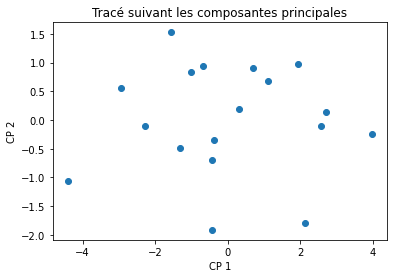

In [30]:
# Tracé les différents véhicules suivant les deux composantes principales
plt.scatter(C1,C2,marker='o')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.title("Tracé suivant les composantes principales")

In [ ]:
# Représenter graphiquement les contributions des variables aux composantes principales :


### Exercice 3 : Jus de fruit 

In [ ]:
# Un jus de fruit est caractériqsé par les caractéristiques suivantes : 
# odeur, pulpeux, couleur, acidité, amertume, sucré, originalité
data={1:[2.82,2.53,1.66,3.46,3.15,2.97,2.60],
      2:[2.76,2.82,1.91,3.23,2.55,2.08,3.32 ],
      3:[2.83,2.88,4.0,3.45,2.42,1.76,3.38 ],
      4:[2.76,2.59,1.66,3.37,3.05,2.56,2.8 ],
      5:[3.2,3.02,3.69,3.12,2.33,1.97,3.34 ],
      6:[3.07,2.73,3.34,3.54,3.31,2.63,2.9 ],
     }

0.9234983786534692


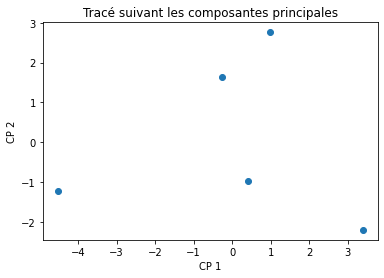

In [34]:
def ACP(data):
    dico={} #Dico des variables
    for v in data.values():
        for i in range(len(v)):
            if i+1 in dico:
                dico[i+1].append(v[i])
            else:
                dico[i+1]=[v[i]]
                
                
    mCor=matCor(dico)  #Matrice de corrélation
    
    valProp=mCor.eigenvalues() #Valeurs propres de la matrice de corrélation
    
    sommeVP=0
    for v in valProp:
        sommeVP+=v
    print((valProp[0]+valProp[1])/sommeVP) # % d'inertie conservé
    
    mPassage=mCor.eigenmatrix_right()[1] #Matrice P
    
    mX=[]                       #Matrice X centrée réduite
    for v in dico.values(): 
        L=[]
        moyenne = moy(v)
        ecartType = ecTypeS(v)
        for i in range(len(v)):
            L.append(n((v[i]-moyenne)/ecartType))
        mX.append(L)
        
    mX=matrix(mX).transpose() #On transpose X pour pourvoir faire C=X*P
    
    mC=mX*mPassage #Matrice C
    
    C1=[] #On prend les 2 composante du plan principal
    C2=[]
    for v in mC:
        C1.append(v[0])
        C2.append(v[1])
    
    plt.scatter(C1,C2,marker='o') #On trace les points sur le plan principal
    plt.xlabel('CP 1')
    plt.ylabel('CP 2')
    plt.title("Tracé suivant les composantes principales")
    
ACP(data)


In [ ]:
ACP(voitures)